<h1>Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [3]:
def sum_prod(X, V):
    """
    X - список матриц (n, n)
    V - список векторов (n, 1)
    Возвращает сумму произведений X[i] @ V[i]
    """
    result = np.zeros_like(V[0], dtype=float)  # исправлено
    for A, v in zip(X, V):
        result += A @ v
    return result


def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[0, 1], [1, 0]])]
    V = [np.array([[1], [1]]), np.array([[2], [3]])]
    expected = (X[0] @ V[0]) + (X[1] @ V[1])
    assert np.array_equal(sum_prod(X, V), expected)

    X = [np.eye(2), np.eye(2)]
    V = [np.array([[1], [2]]), np.array([[3], [4]])]
    expected = np.array([[4], [6]])
    assert np.array_equal(sum_prod(X, V), expected)

    X = [np.zeros((2,2))]
    V = [np.array([[5], [6]])]
    expected = np.array([[0], [0]])
    assert np.array_equal(sum_prod(X, V), expected)

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_sum_prod()


Тесты пройдены!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [5]:
def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

def test_binarize():
    M = np.array([[0.1, 0.6], [0.5, 0.9]])
    expected = np.array([[0, 1], [0, 1]])
    assert np.array_equal(binarize(M), expected)

    M = np.array([[0, 1, 2], [3, 4, 5]])
    expected = np.array([[0, 0, 0], [1, 1, 1]])
    assert np.array_equal(binarize(M, threshold=2), expected)

    M = np.zeros((2,2))
    expected = np.zeros((2,2), dtype=int)
    assert np.array_equal(binarize(M), expected)

    M = np.ones((2,2))
    expected = np.ones((2,2), dtype=int)
    assert np.array_equal(binarize(M), expected)

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_binarize()


Тесты пройдены!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [6]:
def unique_rows(M):
    return np.array([np.unique(row) for row in M], dtype=object)

def unique_cols(M):
    return np.array([np.unique(col) for col in M.T], dtype=object)

def test_unique_rows_cols():
    M = np.array([[1, 2, 2],
                  [3, 3, 4]])
    expected_rows = np.array([np.array([1,2]), np.array([3,4])], dtype=object)
    expected_cols = np.array([np.array([1,3]), np.array([2,3]), np.array([2,4])], dtype=object)

    assert all(np.array_equal(r, e) for r, e in zip(unique_rows(M), expected_rows))
    assert all(np.array_equal(c, e) for c, e in zip(unique_cols(M), expected_cols))

    M = np.array([[5,5,5],[6,7,6]])
    expected_rows = np.array([np.array([5]), np.array([6,7])], dtype=object)
    expected_cols = np.array([np.array([5,6]), np.array([5,7]), np.array([5,6])], dtype=object)

    assert all(np.array_equal(r, e) for r, e in zip(unique_rows(M), expected_rows))
    assert all(np.array_equal(c, e) for c, e in zip(unique_cols(M), expected_cols))

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_unique_rows_cols()

Тесты пройдены!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

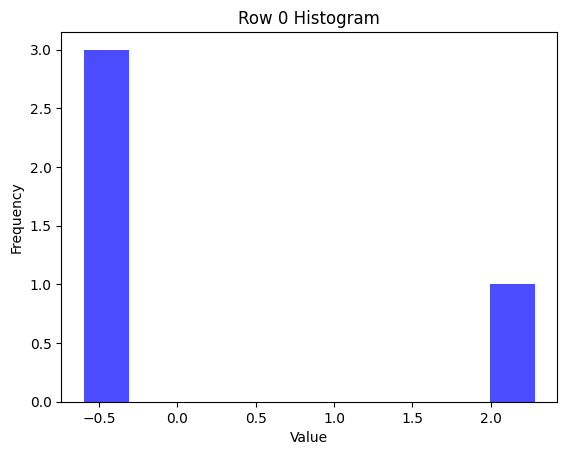

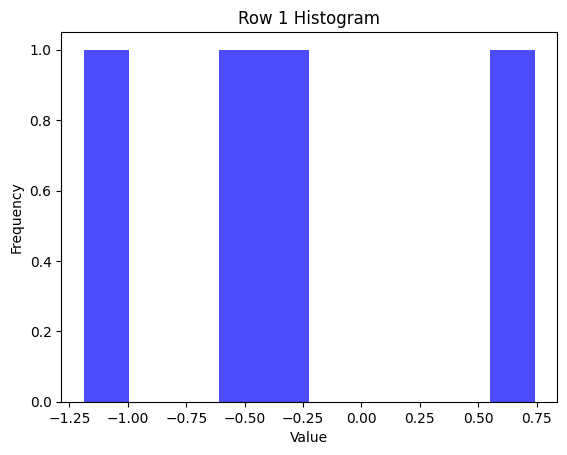

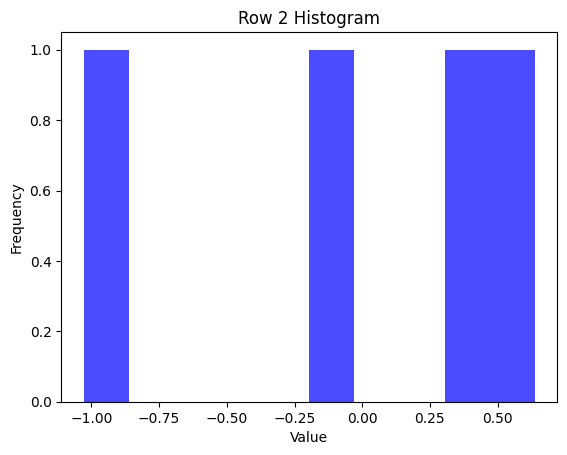

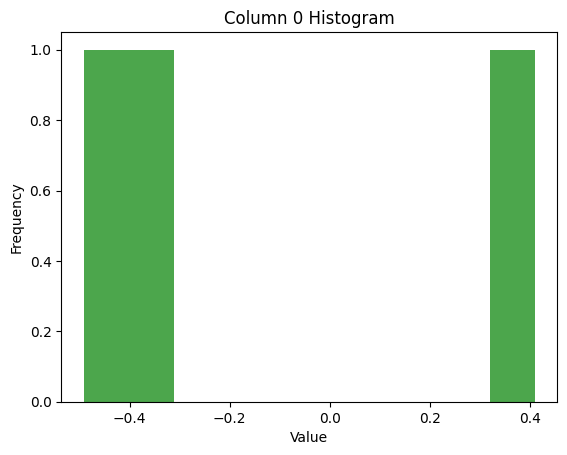

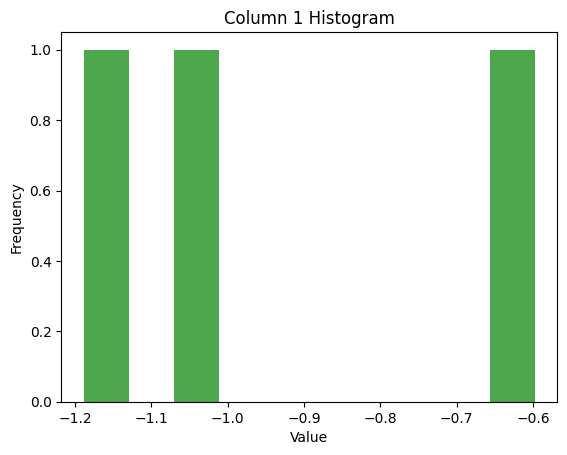

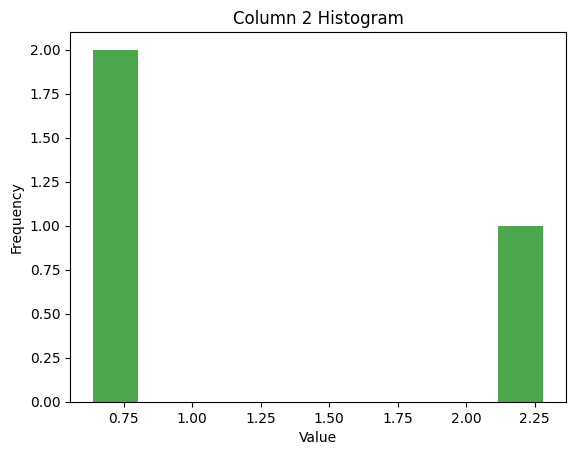

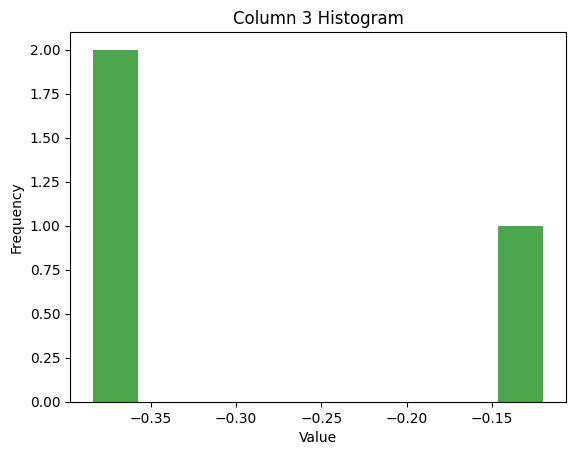

Тесты пройдены!


In [7]:
def analyze_matrix(m, n):
    M = np.random.randn(m, n)
    
    row_means = M.mean(axis=1)
    row_vars = M.var(axis=1)
    
    col_means = M.mean(axis=0)
    col_vars = M.var(axis=0)
    
    for i, row in enumerate(M):
        plt.figure()
        plt.hist(row, bins=10, alpha=0.7, color='blue')
        plt.title(f"Row {i} Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    
    for j, col in enumerate(M.T):
        plt.figure()
        plt.hist(col, bins=10, alpha=0.7, color='green')
        plt.title(f"Column {j} Histogram")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()
    
    return {"row_means": row_means, "row_vars": row_vars,
            "col_means": col_means, "col_vars": col_vars}

def test_analyze_matrix():
    result = analyze_matrix(3, 4)
    assert "row_means" in result
    assert "row_vars" in result
    assert "col_means" in result
    assert "col_vars" in result
    assert len(result["row_means"]) == 3
    assert len(result["col_means"]) == 4
    print("Тесты пройдены!")

if __name__ == "__main__":
    test_analyze_matrix()


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [9]:
def chess(m, n, a, b):
    M = np.zeros((m, n), dtype=int)
    for i in range(m):
        for j in range(n):
            M[i, j] = a if (i + j) % 2 == 0 else b
    return M

def test_chess():
    expected = np.array([[1, 2, 1],
                         [2, 1, 2],
                         [1, 2, 1]])
    assert np.array_equal(chess(3, 3, 1, 2), expected)

    expected = np.array([[0, 5],
                         [5, 0]])
    assert np.array_equal(chess(2, 2, 0, 5), expected)

    expected = np.array([[7]])
    assert np.array_equal(chess(1, 1, 7, 9), expected)

    expected = np.array([[1,2,1,2],
                         [2,1,2,1]])
    assert np.array_equal(chess(2, 4, 1, 2), expected)

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_chess()

Тесты пройдены!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

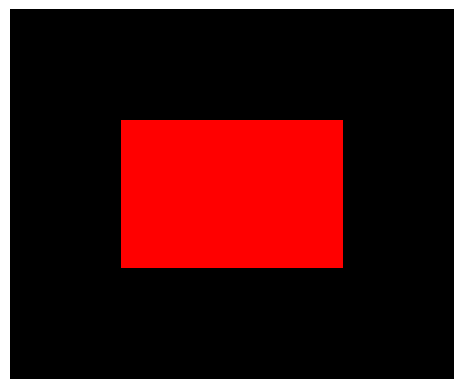

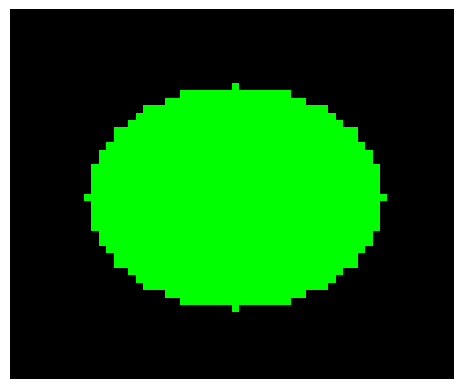

Тесты пройдены!


In [10]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:, :] = background_color
    start_x = (m - a) // 2
    start_y = (n - b) // 2
    img[start_x:start_x+a, start_y:start_y+b] = rectangle_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.zeros((m, n, 3), dtype=np.uint8)
    img[:, :] = background_color
    x0, y0 = m // 2, n // 2
    for i in range(m):
        for j in range(n):
            if ((i - x0)**2 / a**2 + (j - y0)**2 / b**2) <= 1:
                img[i, j] = ellipse_color
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img

def test_draw_shapes():
    rect_img = draw_rectangle(20, 30, 50, 60, [255,0,0], [0,0,0])
    assert rect_img.shape == (50, 60, 3)
    assert (rect_img[0,0] == [0,0,0]).all()
    assert (rect_img[25,30] == [255,0,0]).all()

    ellipse_img = draw_ellipse(15, 20, 50, 60, [0,255,0], [0,0,0])
    assert ellipse_img.shape == (50, 60, 3)
    assert (ellipse_img[0,0] == [0,0,0]).all()
    assert (ellipse_img[25,30] == [0,255,0]).all()

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_draw_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [11]:
def analyze_time_series(series, p=3):
    series = np.array(series)
    mean = series.mean()
    var = series.var()
    std = series.std()

    local_max = [i for i in range(1, len(series)-1) if series[i] > series[i-1] and series[i] > series[i+1]]
    local_min = [i for i in range(1, len(series)-1) if series[i] < series[i-1] and series[i] < series[i+1]]

    if p > len(series):
        moving_avg = np.array([])
    else:
        moving_avg = np.convolve(series, np.ones(p)/p, mode='valid')

    return {
        "mean": mean,
        "variance": var,
        "std": std,
        "local_max": local_max,
        "local_min": local_min,
        "moving_avg": moving_avg
    }

def test_analyze_time_series():
    series = [1, 3, 2, 5, 4, 6, 5]
    result = analyze_time_series(series, p=3)

    assert np.isclose(result["mean"], np.mean(series))
    assert np.isclose(result["variance"], np.var(series))
    assert np.isclose(result["std"], np.std(series))
    assert result["local_max"] == [1, 3, 5]
    assert result["local_min"] == [2, 4]
    assert np.allclose(result["moving_avg"], np.convolve(series, np.ones(3)/3, mode='valid'))

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_analyze_time_series()

Тесты пройдены!


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [12]:
def one_hot_encode(labels):
    labels = np.array(labels)
    num_classes = labels.max() + 1
    one_hot = np.zeros((len(labels), num_classes), dtype=int)
    one_hot[np.arange(len(labels)), labels] = 1
    return one_hot

def test_one_hot_encode():
    labels = [0, 2, 3, 0]
    expected = np.array([
        [1, 0, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0]
    ])
    assert np.array_equal(one_hot_encode(labels), expected)

    labels = [1, 0, 2]
    expected = np.array([
        [0, 1, 0],
        [1, 0, 0],
        [0, 0, 1]
    ])
    assert np.array_equal(one_hot_encode(labels), expected)

    labels = [0, 0, 0]
    expected = np.array([
        [1],
        [1],
        [1]
    ])
    assert np.array_equal(one_hot_encode(labels), expected)

    print("Тесты пройдены!")

if __name__ == "__main__":
    test_one_hot_encode()

Тесты пройдены!
